In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

In [10]:
df = pd.read_csv('/content/Training_Dataset_v2.csv',skipinitialspace=True)
df.info()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

In [11]:
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [12]:
#removing duplicate entries if any
df.duplicated(subset=None,keep='first')

0          False
1          False
2          False
3          False
4          False
           ...  
1687856    False
1687857    False
1687858    False
1687859    False
1687860    False
Length: 1687861, dtype: bool

In [13]:
df.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.687860e+06,1.586967e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06
mean,4.961118e+02,7.872267e+00,4.405202e+01,1.781193e+02,3.449867e+02,5.063644e+02,5.592607e+01,1.750259e+02,3.417288e+02,5.252697e+02,5.277230e+01,2.043724e+00,-6.872059e+00,-6.437947e+00,6.264507e-01
std,2.961523e+04,7.056024e+00,1.342742e+03,5.026553e+03,9.795152e+03,1.437892e+04,1.928196e+03,5.192378e+03,9.613167e+03,1.483861e+04,1.254983e+03,2.360165e+02,2.655636e+01,2.584333e+01,3.372224e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00
75%,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,9.700000e-01,9.500000e-01,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.427612e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


In [14]:
df.isnull().sum()

sku                       0
national_inv              1
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg          1
perf_12_month_avg         1
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
went_on_backorder         1
dtype: int64

- lead_time has over 100k missing values.

In [0]:
df.dropna(inplace=True)

- 100k rows is a very small fraction of data, So its safe to drop rows with null values

In [16]:
df['went_on_backorder'].value_counts()

No     1575998
Yes      10969
Name: went_on_backorder, dtype: int64

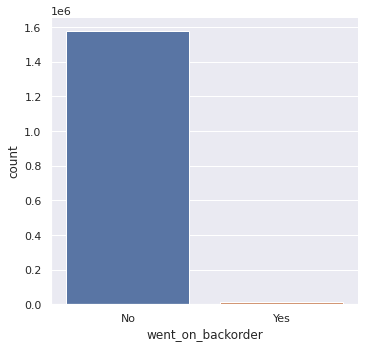

In [17]:
sns.catplot(x="went_on_backorder", kind="count", data=df)

- Dataset is highly imbalanced

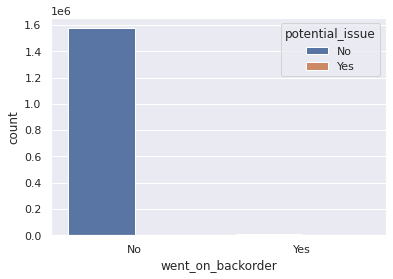

In [18]:
sns.countplot(x="went_on_backorder", hue="potential_issue", data=df);

- Almost no product were found with potential issue.

In [19]:
df['potential_issue'] = df['potential_issue'].astype(str)
df['potential_issue'] = df['potential_issue'].map({'No':'0','Yes':'1'},na_action='ignore')

df['deck_risk'] = df['deck_risk'].astype(str)
df['deck_risk'] = df['deck_risk'].map({'No':0,'Yes':1},na_action='ignore')

df['oe_constraint'] = df['oe_constraint'].astype(str)
df['oe_constraint'] = df['oe_constraint'].map({'No':0,'Yes':1},na_action='ignore')

df['ppap_risk'] = df['ppap_risk'].astype(str)
df['ppap_risk'] = df['ppap_risk'].map({'No':0,'Yes':1},na_action='ignore')

df['stop_auto_buy'] = df['stop_auto_buy'].astype(str)
df['stop_auto_buy'] = df['stop_auto_buy'].map({'No':0,'Yes':1},na_action='ignore')

df['rev_stop'] = df['rev_stop'].astype(str)
df['rev_stop'] = df['rev_stop'].map({'No':0,'Yes':1})
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.99,0.99,0.0,0,0,0,1,0,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.10,0.13,0.0,0,0,0,1,0,No
5,1044198,13.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.82,0.87,0.0,0,0,0,1,0,No
7,1045098,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.00,0.00,0.0,1,0,1,1,0,No
9,1045867,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.82,0.87,0.0,0,0,0,1,0,No


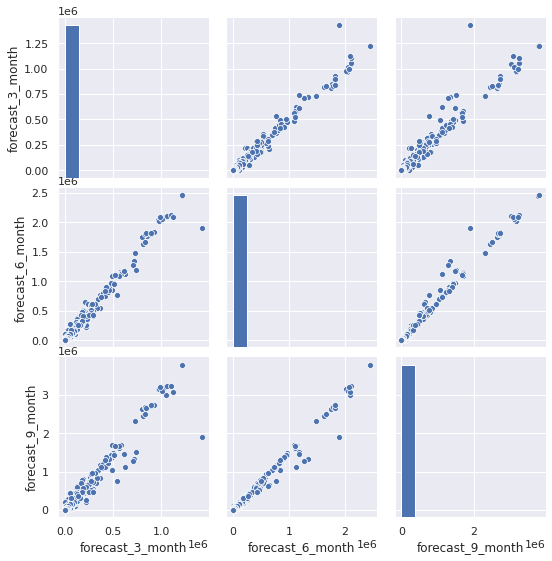

In [20]:
forecast_df = pd.DataFrame(df[['forecast_3_month','forecast_6_month','forecast_9_month']])
sns.pairplot(data=forecast_df)
plt.show()

- Almost perfectly positive relation is visible among forecast of 3,6 & 9 months. 

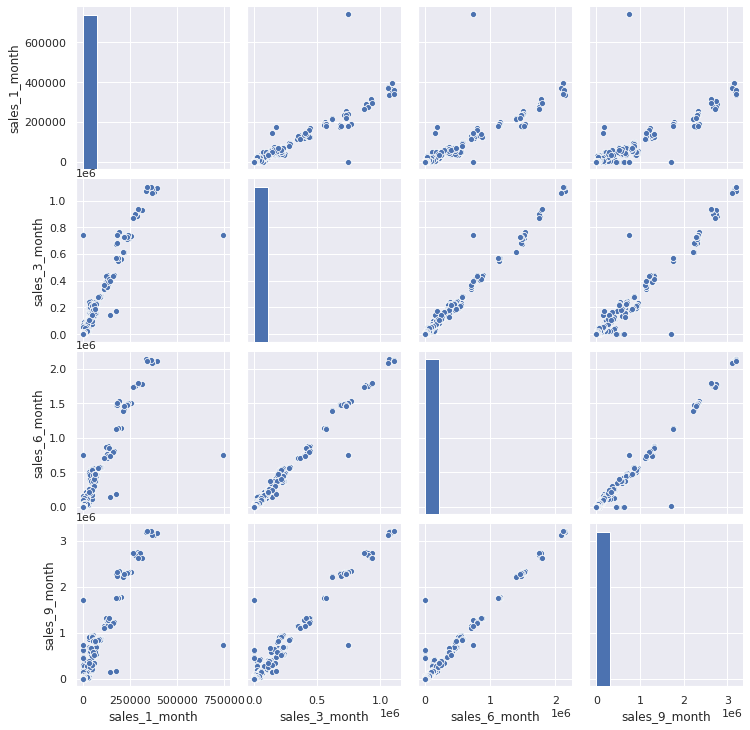

In [21]:
sales_df = pd.DataFrame(df[['sales_1_month','sales_3_month','sales_6_month','sales_9_month']])
sns.pairplot(data=sales_df)
plt.show()

- There is notable pattern in sales.

- **Removing outliers from lead_time**

In [22]:
min_thresold = df['lead_time'].quantile(.02)
min_thresold

2.0

In [23]:
max_thresold = df['lead_time'].quantile(0.98)
max_thresold

17.0

In [0]:
#Dropping outliers
df = df[(df['lead_time']<max_thresold) & (df['lead_time']>min_thresold)]

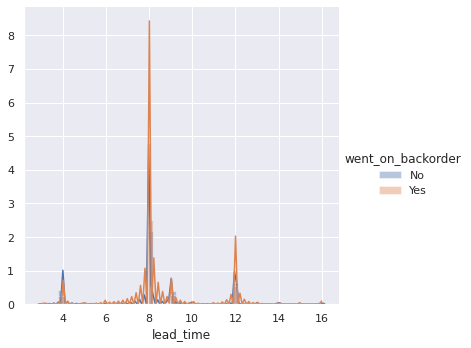

In [25]:
sns.FacetGrid(df,hue="went_on_backorder",height=5).map(sns.distplot,"lead_time").add_legend();    
plt.show()

- Amount of product being backorderd is at peek when the transit time is around 8.

In [26]:
pd.crosstab(df.potential_issue, df.went_on_backorder,normalize='index')

went_on_backorder,No,Yes
potential_issue,,
0,0.993946,0.006054
1,0.938517,0.061483


- Most of the products which were backorderd did not have any potential issue.
- There are only around 6% products with potential issues were  backorderd.

In [40]:
corr_df = df.drop(columns=['sku','deck_risk','oe_constraint','ppap_risk','stop_auto_buy','rev_stop'])
corr_mat = corr_df.corr()
corr_mat.style.background_gradient(cmap='coolwarm')

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
national_inv,1.000000,-0.000961,0.077356,0.067317,0.068822,0.067846,0.131245,0.189865,0.230767,0.248420,0.473228,0.025717,-0.031533,-0.027414,0.011566
lead_time,-0.000961,1.000000,-0.008952,-0.008519,-0.009399,-0.009613,-0.006616,-0.008728,-0.009209,-0.010025,-0.010079,-0.002469,0.009021,0.012575,-0.003499
in_transit_qty,0.077356,-0.008952,1.000000,0.687686,0.721868,0.711115,0.529005,0.630053,0.644740,0.625633,0.707457,0.175433,-0.003459,-0.000181,0.041882
forecast_3_month,0.067317,-0.008519,0.687686,1.000000,0.988651,0.971465,0.690576,0.806739,0.823338,0.798244,0.815046,0.298021,0.001143,0.001955,0.038761
forecast_6_month,0.068822,-0.009399,0.721868,0.988651,1.000000,0.993186,0.714244,0.843598,0.864841,0.839230,0.832715,0.301778,0.000943,0.001489,0.039165
forecast_9_month,0.067846,-0.009613,0.711115,0.971465,0.993186,1.000000,0.734935,0.874147,0.897874,0.871460,0.827662,0.303770,0.000716,0.001077,0.038958
sales_1_month,0.131245,-0.006616,0.529005,0.690576,0.714244,0.734935,1.000000,0.894208,0.848251,0.801590,0.659622,0.223010,-0.003622,0.000329,0.043516
sales_3_month,0.189865,-0.008728,0.630053,0.806739,0.843598,0.874147,0.894208,1.000000,0.985952,0.945800,0.799577,0.281042,-0.004831,-0.000246,0.049030
sales_6_month,0.230767,-0.009209,0.644740,0.823338,0.864841,0.897874,0.848251,0.985952,1.000000,0.969635,0.835999,0.283608,-0.005038,-0.000873,0.044421
sales_9_month,0.248420,-0.010025,0.625633,0.798244,0.839230,0.871460,0.801590,0.945800,0.969635,1.000000,0.824496,0.276110,-0.005108,-0.001162,0.039096


- Sales as well as forecast attributes are highly correlated.

- **Feature Importance by Tree-based estimators**

In [41]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
X = df.drop(columns=["sku","went_on_backorder"])
y = df['went_on_backorder']
clf.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

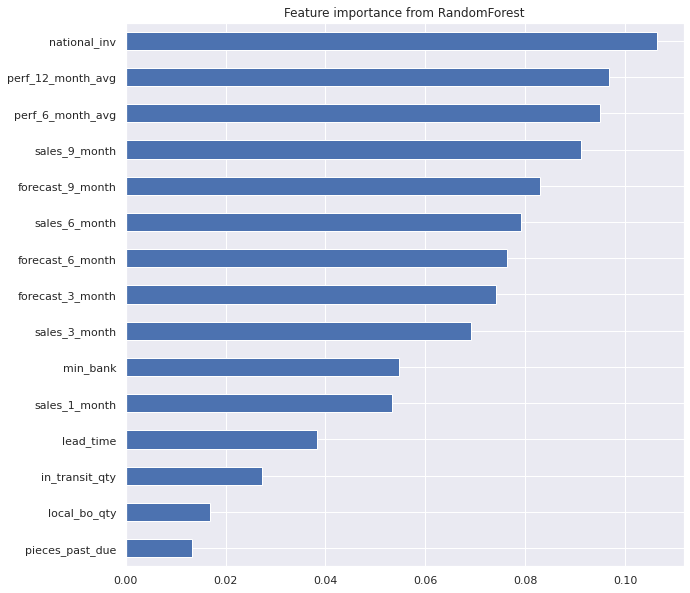

In [45]:
pd.Series(clf.feature_importances_, index = X.columns).nlargest(15).plot(kind = 'barh',\
                                                                               figsize = (10, 10),\
                                                                              title = 'Feature importance from RandomForest').invert_yaxis();